In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install scikit-learn==1.4.0

In [ ]:
import sklearn
print(sklearn.__version__)

1.4.0


In [ ]:
import pandas as pd
import numpy as np
import os
from natsort import natsorted
import joblib


# **TRYING DIFFERENT ML MODELS ON THE ALL 12 LEADS COMBINED FILE WITH DIMENSIONALITY REDUCTION**

##### **KNN**


In [ ]:

# Import the necessary modules for ML model
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# Setup the pipeline steps:
steps = [('knn', KNeighborsClassifier())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)


k_range = list(range(1, 30))
parameters = dict(knn__n_neighbors=k_range)

final_result_df=pd.read_csv('/content/drive/MyDrive/MAJOR_PROJECT/Final_Dataset/With_Dimentionality_Reduction/pca_final.csv')
final_result_df.drop(columns=['Unnamed: 0'], inplace=True)


#input
X = final_result_df.iloc[:,:-1]

#target
y=final_result_df.iloc[:,-1]

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

#increasing cv score takes lot of time in gooogle colab, so kept it just 2.
cv = GridSearchCV(pipeline,parameters,cv=2)

cv.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

Knn_Accuracy = cv.score(X_test, y_test)

# Compute and print metrics
print("Accuracy: {}".format(Knn_Accuracy))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))


Accuracy: 0.793010752688172
              precision    recall  f1-score   support

           0       0.92      0.65      0.76       105
           1       0.95      0.91      0.93        94
           2       0.70      0.86      0.77       112
           3       0.65      0.74      0.69        61

    accuracy                           0.79       372
   macro avg       0.80      0.79      0.79       372
weighted avg       0.81      0.79      0.79       372

Tuned Model Parameters: {'knn__n_neighbors': 1}


##### **LOGISTIC REGRESSION**


In [ ]:

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# Setup the pipeline steps:
steps = [('lr', LogisticRegression())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)


final_result_df=pd.read_csv('/content/drive/MyDrive/MAJOR_PROJECT/Final_Dataset/With_Dimentionality_Reduction/pca_final.csv')
final_result_df.drop(columns=['Unnamed: 0'], inplace=True)

#input
X = final_result_df.iloc[:,:-1]

#target
y=final_result_df.iloc[:,-1]

#parameters for gridsearchcv
c_space = np.logspace(-4, 4, 10)
parameters = {'lr__C': c_space,'lr__penalty': ['l2'], 'lr__max_iter': [11000]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

#call GridSearchCV and set crossvalscore to 2
cv = GridSearchCV(pipeline,parameters,cv=2)

cv.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)
LR_Accuracy = cv.score(X_test, y_test)



# Compute and print metrics
print("Accuracy: {}".format(LR_Accuracy))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.7795698924731183
              precision    recall  f1-score   support

           0       0.85      0.57      0.68       105
           1       0.83      0.91      0.87        94
           2       0.82      0.87      0.84       112
           3       0.60      0.77      0.68        61

    accuracy                           0.78       372
   macro avg       0.77      0.78      0.77       372
weighted avg       0.79      0.78      0.78       372

Tuned Model Parameters: {'lr__C': 0.046415888336127774, 'lr__max_iter': 11000, 'lr__penalty': 'l2'}


##### **SVM**

In [ ]:

# Import the necessary modules for ML model
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# Setup the pipeline
steps = [('SVM', SVC())]

pipeline = Pipeline(steps)


final_result_df=pd.read_csv('/content/drive/MyDrive/MAJOR_PROJECT/Final_Dataset/With_Dimentionality_Reduction/pca_final.csv')
final_result_df.drop(columns=['Unnamed: 0'], inplace=True)

#input
X = final_result_df.iloc[:,:-1]

#target
y=final_result_df.iloc[:,-1]

# Specify the hyperparameter space, if we increase the penalty(c) and gamma value the accurancy can be increased.
#since it takes lots of time in google colab provided only a single value
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=21)

cv = GridSearchCV(pipeline,parameters,cv=3)
cv.fit(X_train,y_train)

y_pred = cv.predict(X_test)
SVM_Accuracy = cv.score(X_test, y_test)

# Compute and print metrics
SVM_Accuracy=cv.score(X_test, y_test)

print("Accuracy: {}".format(SVM_Accuracy))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.9051724137931034
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       119
           1       1.00      1.00      1.00       125
           2       0.91      0.89      0.90       140
           3       0.93      0.78      0.84        80

    accuracy                           0.91       464
   macro avg       0.91      0.89      0.90       464
weighted avg       0.91      0.91      0.91       464

Tuned Model Parameters: {'SVM__C': 10, 'SVM__gamma': 0.01}


### **XGBOOST**

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: {}".format(accuracy))
print(classification_report(y_test, y_pred))

Accuracy: 0.8577586206896551
              precision    recall  f1-score   support

           0       0.81      0.73      0.77       119
           1       0.97      1.00      0.98       125
           2       0.83      0.90      0.86       140
           3       0.79      0.75      0.77        80

    accuracy                           0.86       464
   macro avg       0.85      0.85      0.85       464
weighted avg       0.86      0.86      0.86       464



### **ENSEMBLE**

In [ ]:
# Importing required modules
from sklearn import linear_model, tree, ensemble
from sklearn.naive_bayes import GaussianNB
import xgboost
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
import pickle
import warnings

In [ ]:
final_result_df=pd.read_csv('/content/drive/MyDrive/MAJOR_PROJECT/Final_Dataset/With_Dimentionality_Reduction/pca_final.csv')
final_result_df.drop(columns=['Unnamed: 0'], inplace=True)

#input
X = final_result_df.iloc[:,0:-1]

#target
y=final_result_df.iloc[:,-1]

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
 # Stacking of ML Models
eclf = VotingClassifier(estimators=[
    ('SVM', SVC(probability=True)),
    ('knn', KNeighborsClassifier()),
    ('rf', ensemble.RandomForestClassifier()),
    ('bayes',GaussianNB()),
    ('logistic',LogisticRegression(max_iter=11000)),
    ], voting='soft')

In [ ]:
# Hyperparameter Tuning using gridSearch
params = {'SVM__C':[1, 10, 100],
          'SVM__gamma':[0.1, 0.01],
          'knn__n_neighbors': [1,3,5],
          'rf__n_estimators':[300, 400],
          }



warnings.filterwarnings("ignore")
grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
voting_clf = grid.fit(X_train, y_train)

print(grid.best_params_)
y_pred = voting_clf.predict(X_test)

# Compute and print metrics
Voting_Accuracy=voting_clf.score(X_test, y_test)

print("Accuracy: {}".format(Voting_Accuracy))
print(classification_report(y_test, y_pred))
print(voting_clf.best_params_)

{'SVM__C': 1, 'SVM__gamma': 0.1, 'knn__n_neighbors': 5, 'rf__n_estimators': 400}
Accuracy: 0.9283154121863799
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        80
           1       1.00      1.00      1.00        72
           2       0.86      0.92      0.89        79
           3       0.86      0.79      0.83        48

    accuracy                           0.93       279
   macro avg       0.92      0.92      0.92       279
weighted avg       0.93      0.93      0.93       279

{'SVM__C': 1, 'SVM__gamma': 0.1, 'knn__n_neighbors': 5, 'rf__n_estimators': 400}


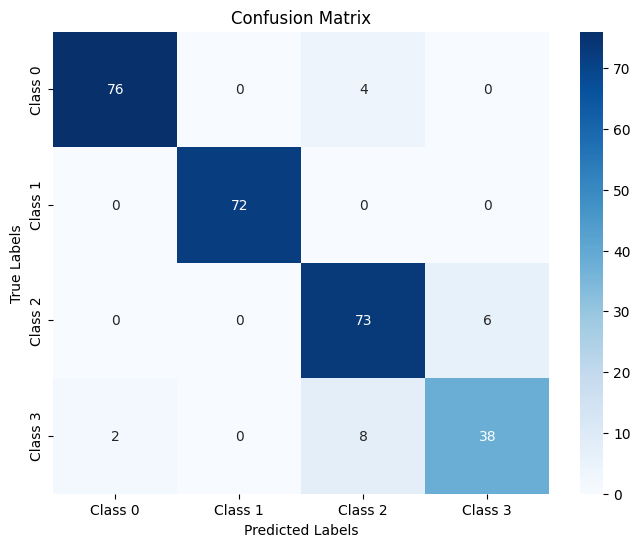

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:

# open a file, where you ant to store the data
file = open('/content/drive/MyDrive/MAJOR_PROJECT/Deployment/Heart_Disease_Prediction_using_ECG.pkl', 'wb')
# dump information to that file
pickle.dump(voting_clf, file)
file.close()

# **Model Testing**
0 - Abnormal Heartbeat
---
1 - Myocardial Infarction
---
2 - Normal
---
3 - History of Myocardial Infarction
---


In [ ]:
X_test = final_result_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/pmi9.csv')
X_test.drop(columns=['Unnamed: 0'], inplace=True)
loaded_model = joblib.load('/content/drive/MyDrive/MAJOR_PROJECT/Deployment/Heart_Disease_Prediction_using_ECG.pkl')

res = loaded_model.predict(X_test)
print(res[0])

3


# **Checking versions**

In [ ]:

import joblib
import pandas as pd
import matplotlib as mpl
import natsort


# Print the versions

print(f"joblib version: {joblib.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"matplotlib version: {mpl.__version__}")
print(f"natsort version: {natsort.__version__}")


joblib version: 1.3.2
pandas version: 2.0.3
matplotlib version: 3.7.1
natsort version: 8.4.0


In [ ]:
import joblib
import sklearn


# Load the GridSearchCV model
with open('/content/drive/MyDrive/MAJOR_PROJECT/Deployment/Heart_Disease_Prediction_using_ECG.pkl', 'rb') as file:
    loaded_model = joblib.load(file, mmap_mode=None)

# Access the best_estimator_ attribute, which is the actual model
best_estimator = loaded_model.best_estimator_

# Check scikit-learn version in the best_estimator
print("scikit-learn version in the loaded model:", sklearn.__version__)

scikit-learn version in the loaded model: 1.4.0


In [ ]:
import sklearn
print(sklearn.__version__)

1.4.0


In [ ]:

import sklearn
print("Scikit-learn version in Colab:", sklearn.__version__)

Scikit-learn version in Colab: 1.4.0


In [ ]:

import joblib
print("Joblib version in Colab:", joblib.__version__)

Joblib version in Colab: 1.3.2


In [ ]:
file_path = '/content/drive/MyDrive/MAJOR_PROJECT/Deployment/Heart_Disease_Prediction_using_ECG.pkl'

!ls $file_path

!ls -l $file_path

!du -sh $file_path

/content/drive/MyDrive/MAJOR_PROJECT/Deployment/Heart_Disease_Prediction_using_ECG.pkl
-rw------- 1 root root 9640451 Apr  5 13:48 /content/drive/MyDrive/MAJOR_PROJECT/Deployment/Heart_Disease_Prediction_using_ECG.pkl
9.2M	/content/drive/MyDrive/MAJOR_PROJECT/Deployment/Heart_Disease_Prediction_using_ECG.pkl


## **Comparing KNN, Logistic regression and SVM**

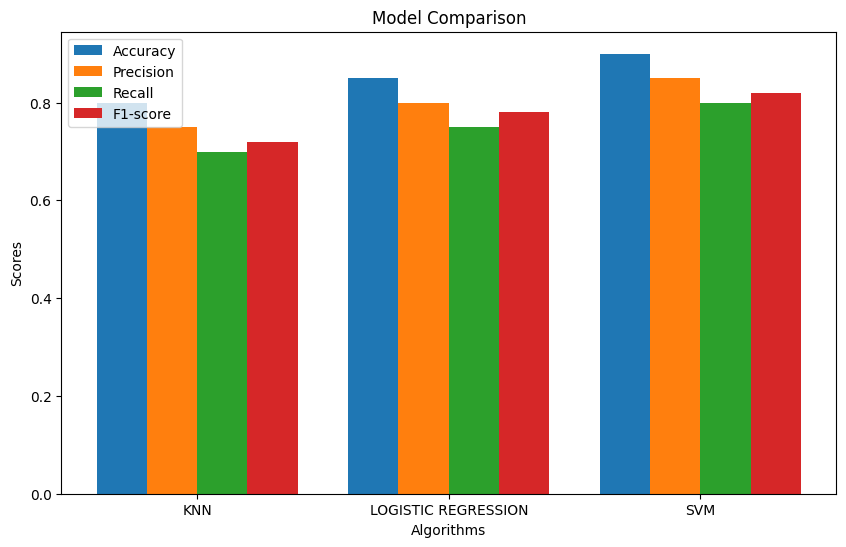

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have collected performance metrics for each algorithm
models = ['KNN', 'LOGISTIC REGRESSION', 'SVM']  # Names of algorithms
accuracy = [0.80, 0.85, 0.90]  # Accuracy scores
precision = [0.75, 0.80, 0.85]  # Precision scores
recall = [0.70, 0.75, 0.80]  # Recall scores
f1_score = [0.72, 0.78, 0.82]  # F1-score scores

x = np.arange(len(models))
width = 0.2

plt.figure(figsize=(10, 6))
plt.bar(x - 1.5*width, accuracy, width, label='Accuracy')
plt.bar(x - 0.5*width, precision, width, label='Precision')
plt.bar(x + 0.5*width, recall, width, label='Recall')
plt.bar(x + 1.5*width, f1_score, width, label='F1-score')

plt.xlabel('Algorithms')
plt.ylabel('Scores')
plt.title('Model Comparison')
plt.xticks(x, models)
plt.legend()
plt.show()
